<a href="https://colab.research.google.com/github/LamaAls04/Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction

## Description:
This dataset contains information about bank customers and their churn status, indicating whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

## Features:
* RowNumber: The sequential number assigned to each row in the dataset.
* CustomerId: A unique identifier for each customer.
* Surname: The surname of the customer.
* CreditScore: The credit score of the customer.
* Geography: The geographical location of the customer (e.g., country or region).
* Gender: The gender of the customer.
* Age: The age of the customer.
* Tenure: The number of years the customer has been with the bank.
* Balance: The account balance of the customer.
* NumOfProducts: The number of bank products the customer has.
* HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).
* IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).
* EstimatedSalary: The estimated salary of the customer.
* Exited: Indicates whether the customer has exited the bank (binary: yes/no).

In [120]:
import pandas as pd

In [121]:
df = pd.read_csv("Churn_Modelling.csv")

In [122]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [124]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 10000
Number of columns: 14


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [126]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [127]:
df.describe(include="all").round(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000,10000.00,10000,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,15690940.57,NaN,650.53,NaN,NaN,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,NaN,96.65,NaN,NaN,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,NaN,350.00,NaN,NaN,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,NaN,584.00,NaN,NaN,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,NaN,652.00,NaN,NaN,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,NaN,718.00,NaN,NaN,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0


In [128]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [129]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [130]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [131]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [132]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [133]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [134]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

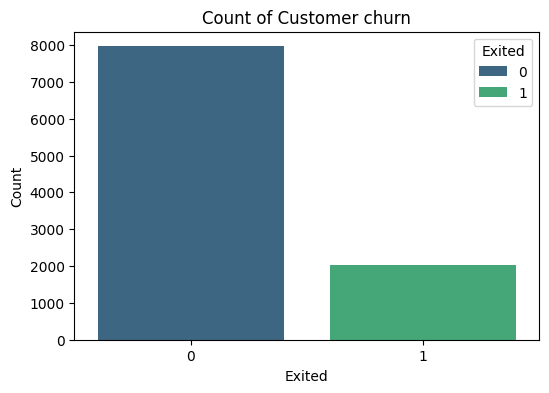

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(x="Exited", data=df, palette="viridis",hue="Exited")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count of Customer churn")
plt.show()

In [140]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

## Handling Impalenced Data With SMOTE

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [143]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

## Feature scaling

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [147]:
y_pred1 = log.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [149]:
accuracy_score(y_test,y_pred1)

0.7749529190207156

In [150]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1633
           1       0.77      0.77      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.78      0.77      0.77      3186



## SVC

In [151]:
from sklearn import svm

In [152]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [153]:
accuracy_score(y_test,y_pred2)

0.8436911487758946

In [154]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1633
           1       0.85      0.83      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



## KNeighbors classifier

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)

In [157]:
accuracy_score(y_test,y_pred3)

0.8163841807909604

In [158]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1633
           1       0.80      0.83      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



## Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)

In [161]:
accuracy_score(y_test,y_pred4)

0.8000627746390458

In [162]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1633
           1       0.79      0.81      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



## Random Forest Classifier

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5 = rf.predict(X_test)

In [165]:
accuracy_score(y_test,y_pred5)

0.8681732580037664

In [166]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1633
           1       0.87      0.86      0.86      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



## Gradient Boosting Classifier

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred6)

0.8411801632140615

In [170]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1633
           1       0.84      0.83      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [171]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5),
                                  accuracy_score(y_test,y_pred6)]})

In [172]:
final_data

,Models,ACC
0,LR,0.774953
1,SVC,0.843691
2,KNN,0.816384
3,DT,0.800063
4,RF,0.868173
5,GBC,0.841180


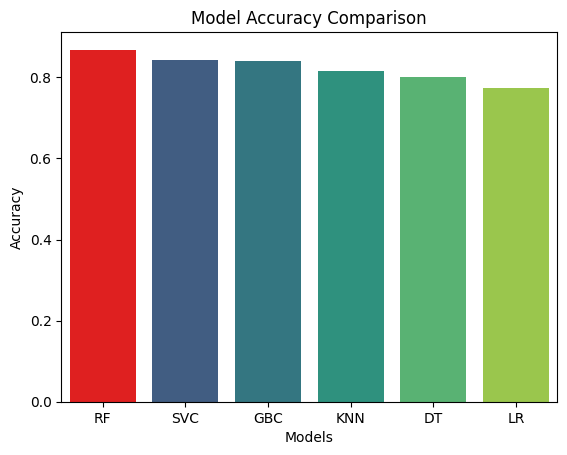

In [173]:
# Sort the data by accuracy in descending order
final_data_sorted = final_data.sort_values(by="ACC", ascending=False)

# Define colors using a seaborn palette and highlighting the highest accuracy
colors = sns.color_palette('viridis', len(final_data_sorted))
colors[0] = 'red'


sns.barplot(x="Models", y="ACC", data=final_data_sorted, hue="Models", palette=colors, legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [174]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'precision':[precision_score(y_test,y_pred1),
                                  precision_score(y_test,y_pred2),
                                  precision_score(y_test,y_pred3),
                                  precision_score(y_test,y_pred4),
                                  precision_score(y_test,y_pred5),
                                  precision_score(y_test,y_pred6)]})

In [175]:
final_data

,Models,precision
0,LR,0.766922
1,SVC,0.846811
2,KNN,0.799876
3,DT,0.785181
4,RF,0.867618
5,GBC,0.839274


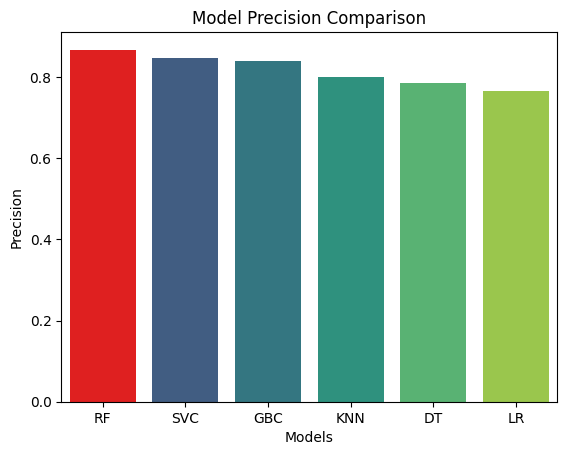

In [176]:
# Sort the data by accuracy in descending order
final_data_sorted = final_data.sort_values(by="precision", ascending=False)

# Define colors using a seaborn palette and highlighting the highest accuracy
colors = sns.color_palette('viridis', len(final_data_sorted))
colors[0] = 'red'


sns.barplot(x="Models", y="precision", data=final_data_sorted, hue="Models", palette=colors, legend=False)
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.show()

## Saving The Model

In [177]:
X_res = sc.fit_transform(X_res)

In [178]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [179]:
import joblib

In [183]:
joblib.dump(rf, "model.pkl")
joblib.dump(sc, "scaler.pkl")
joblib.dump(X.columns, "feature_columns.pkl")

print("Files saved: rf_model.pkl, scaler.pkl, feature_columns.pkl")

Files saved: rf_model.pkl, scaler.pkl, feature_columns.pkl
